In [148]:
#imported the basic libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np   

In [149]:
#importing the dataset into the dataframe
dataset=pd.read_csv("titanic.csv")

In [150]:
#fetch first 5 rows of dataframe.
dataset.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
#extracted everything important
dataset=dataset[['Name','Survived','Pclass','Age','Fare']]

In [152]:
dataset.head()

,Name,Survived,Pclass,Age,Fare
0,"Braund, Mr. Owen Harris",0,3,22.0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,71.2833
2,"Heikkinen, Miss. Laina",1,3,26.0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,53.1000
4,"Allen, Mr. William Henry",0,3,35.0,8.0500


In [153]:
#choose the features and label
x=dataset[['Survived','Pclass','Age','Fare']]
y=dataset['Name']

In [154]:
new = dataset["Name"].str.split(" ", n = 2, expand = True) 

In [155]:
new

,0,1,2
0,"Braund,",Mr.,Owen Harris
1,"Cumings,",Mrs.,John Bradley (Florence Briggs Thayer)
2,"Heikkinen,",Miss.,Laina
3,"Futrelle,",Mrs.,Jacques Heath (Lily May Peel)
4,"Allen,",Mr.,William Henry
...,...,...,...
886,"Montvila,",Rev.,Juozas
887,"Graham,",Miss.,Margaret Edith
888,"Johnston,",Miss.,"Catherine Helen ""Carrie"""
889,"Behr,",Mr.,Karl Howell


In [156]:
y=new[1]

In [157]:
y

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: 1, Length: 891, dtype: object

In [158]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_y=LabelEncoder()
y=labelEncoder_y.fit_transform(y)
y


array([17, 18, 14, 18, 17, 17, 17, 11, 18, 18, 14, 14, 17, 17, 14, 18, 11,
       17, 22, 18, 17, 17, 14, 17, 14, 18, 17, 17, 14, 17,  5, 18, 14, 17,
       17, 17, 17, 17, 22, 14, 18, 18, 17, 14, 14, 17, 17, 14, 17, 18, 11,
       17, 18, 18, 17, 17, 14, 17, 14, 11, 17, 14, 17, 11, 17, 11, 18, 17,
       14, 17, 17, 14, 17, 17, 17, 17, 17, 17, 11, 14, 17, 17, 14, 17, 14,
       18, 17, 17, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 17, 14, 17,
       17, 17, 17, 17, 14, 17, 17, 14, 17, 14, 17, 14, 14, 17, 17, 17, 17,
       14, 17, 17, 17, 14, 17, 11, 17, 17, 14, 17, 17, 17, 18, 18, 17, 17,
       14, 17, 17, 17, 18, 14, 18, 17, 17, 17, 17, 14, 17, 23, 23, 18, 17,
        0, 17, 17, 14, 17, 17, 11, 17, 18, 17, 17, 11, 11, 18, 18, 17, 17,
       28, 11, 14, 17, 17, 17, 11, 14, 17, 17, 14, 17, 11, 11, 14, 17, 18,
       17, 17, 17, 18, 17, 14, 11, 18, 14, 17, 17, 14, 14, 27, 17, 17, 17,
       17, 14, 17, 17, 14, 17, 17, 14, 17, 17, 17, 14, 14, 17, 14, 17, 17,
       17, 17, 17, 17, 17

In [159]:
# x.isnull().sum()
x.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [160]:
from sklearn.impute import SimpleImputer
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_mean.fit(x)
x=impute_mean.transform(x)
x

array([[ 0.        ,  3.        , 22.        ,  7.25      ],
       [ 1.        ,  1.        , 38.        , 71.2833    ],
       [ 1.        ,  3.        , 26.        ,  7.925     ],
       ...,
       [ 0.        ,  3.        , 29.69911765, 23.45      ],
       [ 1.        ,  1.        , 26.        , 30.        ],
       [ 0.        ,  3.        , 32.        ,  7.75      ]])

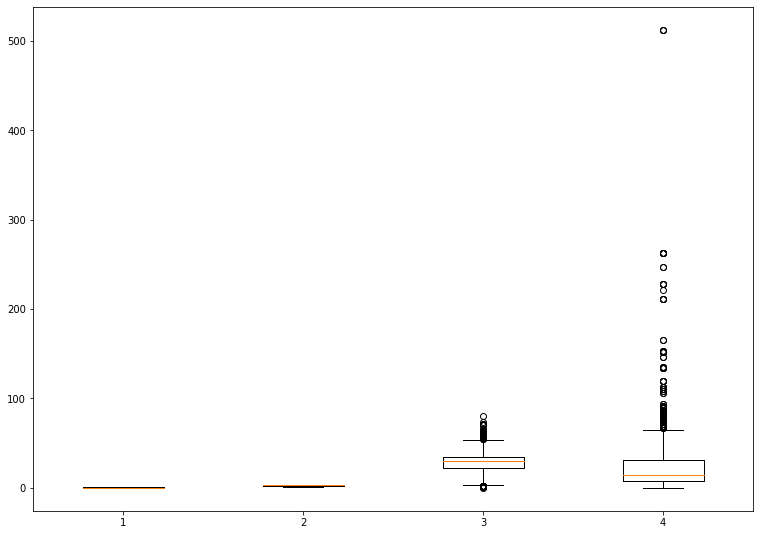

In [161]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(x) 
plt.show() 

In [162]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x= sc_X.fit_transform(x)

In [163]:
x

array([[-0.78927234,  0.82737724, -0.5924806 , -0.50244517],
       [ 1.2669898 , -1.56610693,  0.63878901,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.2846632 , -0.48885426],
       ...,
       [-0.78927234,  0.82737724,  0.        , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.2846632 , -0.04438104],
       [-0.78927234,  0.82737724,  0.17706291, -0.49237783]])

In [164]:
y

array([17, 18, 14, 18, 17, 17, 17, 11, 18, 18, 14, 14, 17, 17, 14, 18, 11,
       17, 22, 18, 17, 17, 14, 17, 14, 18, 17, 17, 14, 17,  5, 18, 14, 17,
       17, 17, 17, 17, 22, 14, 18, 18, 17, 14, 14, 17, 17, 14, 17, 18, 11,
       17, 18, 18, 17, 17, 14, 17, 14, 11, 17, 14, 17, 11, 17, 11, 18, 17,
       14, 17, 17, 14, 17, 17, 17, 17, 17, 17, 11, 14, 17, 17, 14, 17, 14,
       18, 17, 17, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 17, 14, 17,
       17, 17, 17, 17, 14, 17, 17, 14, 17, 14, 17, 14, 14, 17, 17, 17, 17,
       14, 17, 17, 17, 14, 17, 11, 17, 17, 14, 17, 17, 17, 18, 18, 17, 17,
       14, 17, 17, 17, 18, 14, 18, 17, 17, 17, 17, 14, 17, 23, 23, 18, 17,
        0, 17, 17, 14, 17, 17, 11, 17, 18, 17, 17, 11, 11, 18, 18, 17, 17,
       28, 11, 14, 17, 17, 17, 11, 14, 17, 17, 14, 17, 11, 11, 14, 17, 18,
       17, 17, 17, 18, 17, 14, 11, 18, 14, 17, 17, 14, 14, 27, 17, 17, 17,
       17, 14, 17, 17, 14, 17, 17, 14, 17, 17, 17, 14, 14, 17, 14, 17, 17,
       17, 17, 17, 17, 17

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [166]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred

array([18, 14, 11, 14, 11, 14, 14, 14, 18, 17, 17, 17, 17, 14, 14, 14, 17,
       17, 17, 14, 17, 14, 17, 17, 14, 14, 17, 14, 14, 11, 14, 14, 25, 14,
       17, 14, 17, 17, 17, 17, 18, 17, 18, 11, 14, 17, 17, 14, 17, 17, 14,
       14, 14, 17, 14, 17, 17, 14, 11, 14, 17, 17, 18, 17, 14, 17, 18, 17,
       11, 17, 14, 18, 17, 17, 17, 18, 17, 17, 17, 17, 17, 11, 17, 14, 17,
       14, 14, 14, 18, 17, 17, 17, 11, 18, 11, 17, 18, 17, 17, 14, 11, 17,
       17, 17, 12, 13, 18, 18, 17, 14, 17, 17, 17, 17, 18, 19, 18, 14, 17,
       18, 17, 14, 14, 17, 14, 17, 17, 14, 17, 23, 17, 17, 17, 17, 17, 17,
       17, 17, 18, 17, 17, 18, 17, 17, 18, 17, 17, 18,  6, 14, 17, 14, 17,
       17, 14, 17, 18, 14, 17, 14, 17, 17, 18, 18, 14, 17, 17, 17, 17, 17,
       17, 14, 17, 18, 11, 17, 14, 17, 17])

In [167]:
from sklearn.metrics import accuracy_score
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.5865921787709497 


In [168]:
classifier.predict([[1,1,22,7.25]])[0]

14

In [169]:
#['Pclass','Survived','Age','Fare']

pred = classifier.predict([[1,1,38,71.28]])[0]
if pred == 17:
    print("Mr")
elif pred == 18:
    print("Mrs")
elif pred == 14:
    print("Miss")

Miss
